In [22]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import requests

%matplotlib inline

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 100)

plt.style.use('ggplot') # Make the graphs a bit prettier

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'sans-serif'

In [10]:
fitness_with_weather = pd.read_csv('data/processed/fitness_with_weather.csv', 
                                   na_values='Nan',
                                   usecols=['StepCount', 
                                            'Daily Rainfall Total (mm)', 
                                            'Mean Temperature (å¡C)',
                                            'Maximum Temperature (å¡C)',
                                            'Minimum Temperature (å¡C)', 
                                            'Mean Wind Speed (km/h)', 
                                            'Max Wind Speed (km/h)', 
                                            'Station']
                                  )
fitness_with_weather.head()

StepCount                  Station  Daily Rainfall Total (mm)  Mean Temperature (å¡C)  Maximum Temperature (å¡C)  Minimum Temperature (å¡C)  Mean Wind Speed (km/h)  Max Wind Speed (km/h)
0          4                Admiralty                       38.8                    26.6                       32.3                       23.9                     5.4                   31.0
1       4886  Choa Chu Kang (Central)                        0.0                     NaN                        NaN                        NaN                     NaN                    NaN
2       3808  Choa Chu Kang (Central)                        0.2                     NaN                        NaN                        NaN                     NaN                    NaN
3      11630  Choa Chu Kang (Central)                       19.0                     NaN                        NaN                        NaN                     NaN                    NaN
4       2546  Choa Chu Kang (Central)                       13.0                     NaN                        NaN                        NaN                     NaN                    NaN

In [11]:
len(fitness_with_weather)

7204286

In [12]:
len(fitness_with_weather[fitness_with_weather['Station'].notnull()])

4646448

In [13]:
fitness_with_weather.describe()

StepCount  Daily Rainfall Total (mm)  Mean Temperature (å¡C)  Maximum Temperature (å¡C)  Minimum Temperature (å¡C)  Mean Wind Speed (km/h)  Max Wind Speed (km/h)
count  7.204286e+06               4.582918e+06           742063.000000              807778.000000              807778.000000           807373.000000          807789.000000
mean   1.060497e+04               5.456144e+00               28.211008                  32.273172                  25.677246                7.799588              32.694314
std    6.068779e+03               1.220451e+01                1.127500                   1.702962                   1.188806                3.437602               8.271208
min    0.000000e+00               0.000000e+00               24.400000                  26.600000                  21.200000                2.500000              11.200000
25%    6.935000e+03               0.000000e+00               27.600000                  31.400000                  24.900000                5.400000              26.600000
50%    1.025400e+04               0.000000e+00               28.300000                  32.400000                  25.700000                6.800000              31.700000
75%    1.311700e+04               4.600000e+00               28.900000                  33.400000                  26.400000                9.400000              37.100000
max    5.000000e+04               2.170000e+02               31.300000                  36.700000                  29.400000               25.900000              84.600000

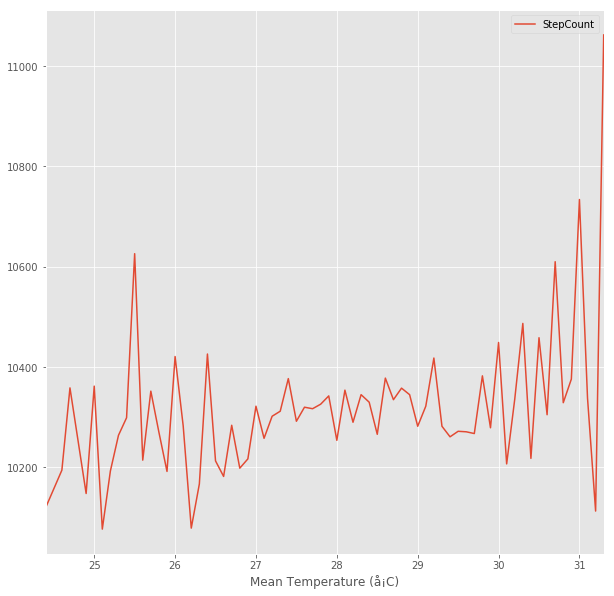

In [15]:
fitness_with_weather[['StepCount', 'Mean Temperature (å¡C)']] \
.groupby('Mean Temperature (å¡C)') \
.agg('median') \
.plot()

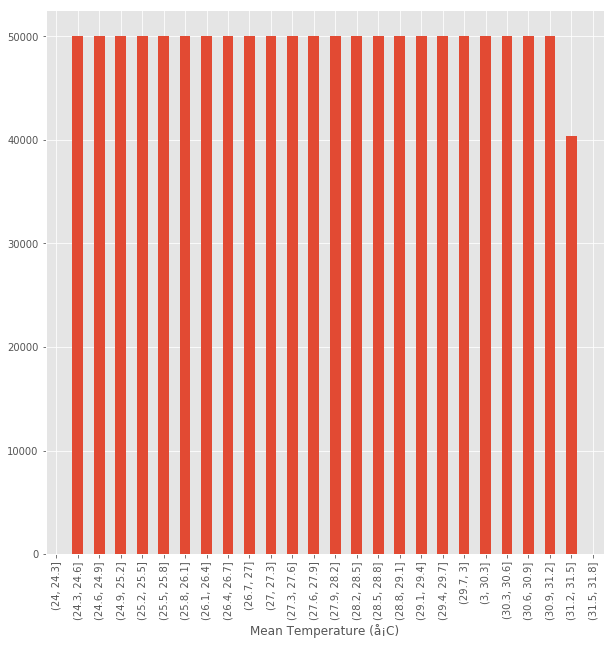

In [18]:
# pd.cut(fitness_with_weather['Daily Rainfall Total (mm)'], np.arange(0.0, 193.0, 10.0))
fitness_with_weather[['StepCount', 'Mean Temperature (å¡C)']] \
.groupby(pd.cut(fitness_with_weather['Mean Temperature (å¡C)'], np.arange(24, 32, 0.3))) \
.agg('max')['StepCount'].plot(kind='bar')

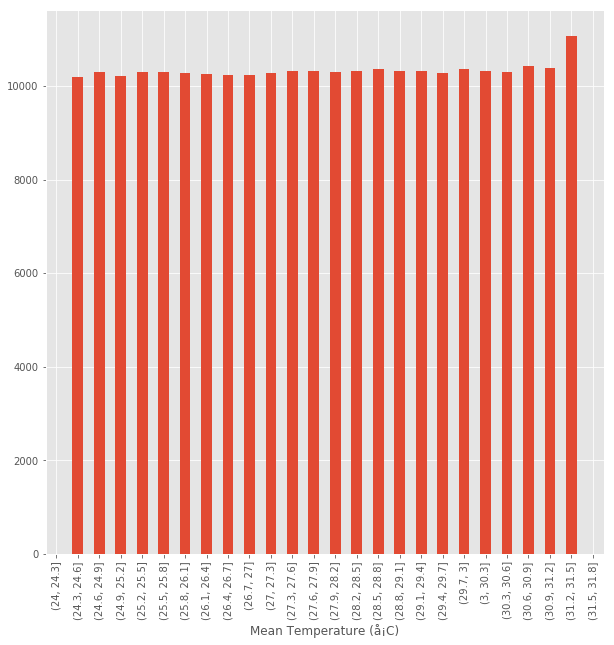

In [19]:
# pd.cut(fitness_with_weather['Daily Rainfall Total (mm)'], np.arange(0.0, 193.0, 10.0))
fitness_with_weather[['StepCount', 'Mean Temperature (å¡C)']] \
.groupby(pd.cut(fitness_with_weather['Mean Temperature (å¡C)'], np.arange(24, 32, 0.3))) \
.agg('median')['StepCount'].plot(kind='bar')

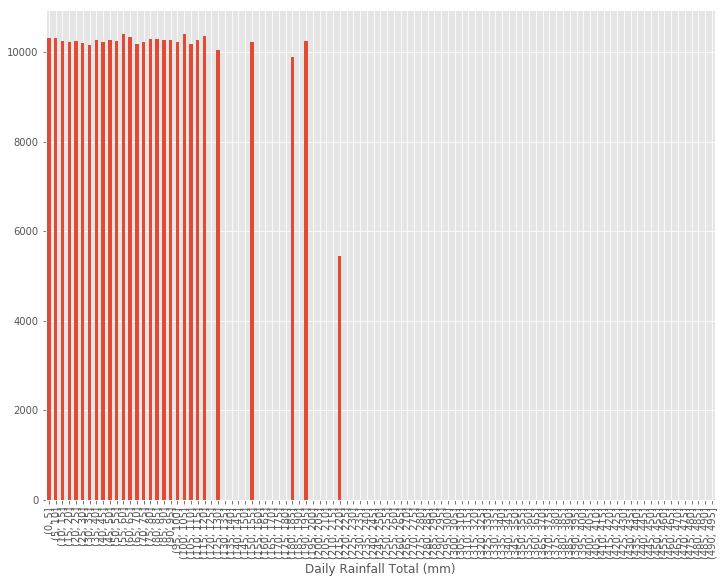

In [31]:
# pd.cut(fitness_with_weather['Daily Rainfall Total (mm)'], np.arange(0.0, 193.0, 10.0))
fitness_with_weather[['StepCount', 'Daily Rainfall Total (mm)']] \
.groupby(pd.cut(fitness_with_weather['Daily Rainfall Total (mm)'], np.arange(0.0, 500.0, 5.0))) \
.agg('median')['StepCount'].plot(kind='bar')

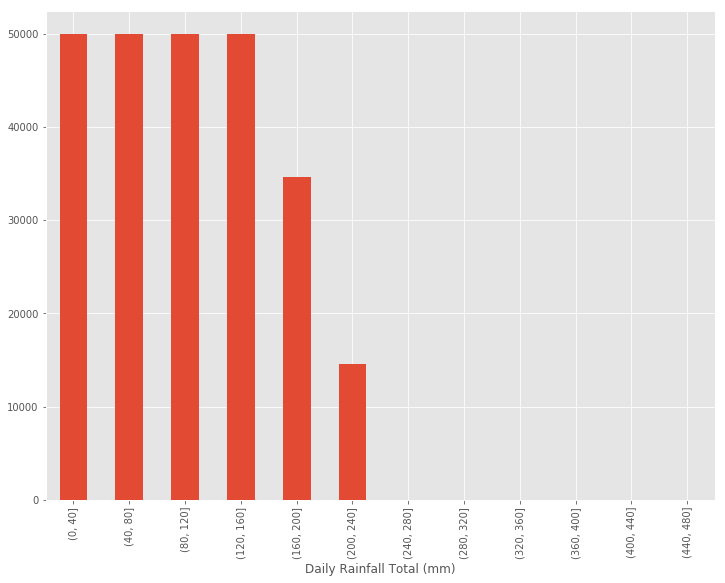

In [24]:
# pd.cut(fitness_with_weather['Daily Rainfall Total (mm)'], np.arange(0.0, 193.0, 10.0))
fitness_with_weather[['StepCount', 'Daily Rainfall Total (mm)']] \
.groupby(pd.cut(fitness_with_weather['Daily Rainfall Total (mm)'], np.arange(0.0, 500, 5.0))) \
.agg('max')['StepCount'].plot(kind='bar')

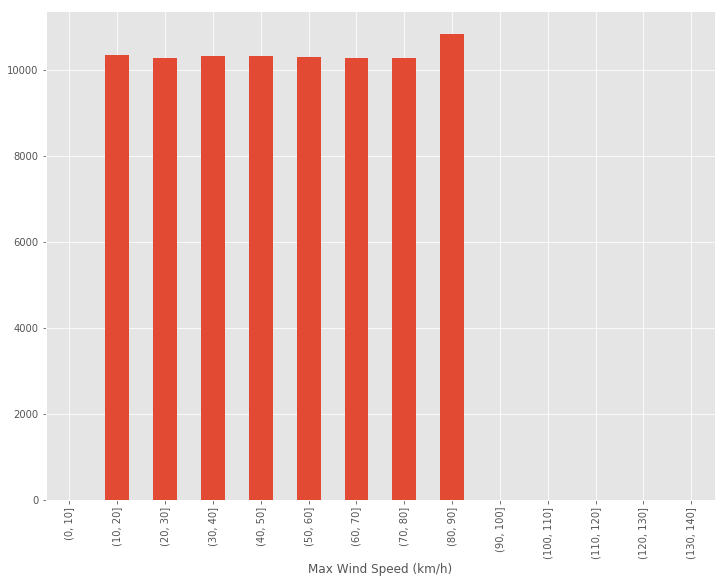

In [30]:
# pd.cut(fitness_with_weather['Daily Rainfall Total (mm)'], np.arange(0.0, 193.0, 10.0))
fitness_with_weather[['StepCount', 'Max Wind Speed (km/h)']] \
.groupby(pd.cut(fitness_with_weather['Max Wind Speed (km/h)'], np.arange(0, 150, 10))) \
.agg('median')['StepCount'].plot(kind='bar')